------------------------------------------------
###Title: HW 4: Regression in Python
###Author: Udit Chaudhary
###Date: 2023-10-20(YYYY_MM_DD)
------------------------------------------------

##Regression in Python

In Python, regression serves as a predictive modeling method dedicated to anticipating quantitative target attributes. This assignment takes a hands-on approach, showcasing diverse regression techniques within the scikit-learn library. It addresses the issue of model overfitting arising from correlated data attributes, stressing the need to grasp and address this challenge. The assignment further explores the utilization of regularization techniques as a vital strategy to counteract overfitting, offering a thorough exploration of methods to enhance the precision and dependability of regression models.

###Load Dataset

Using pandas, read the Tornados dataset and save it in the data variable.

In [3]:
import pandas as pd

#Read the Tornados Data
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-16/tornados.csv', header='infer')
data

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3000,15.80,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0000,2.00,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0000,0.10,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0000,0.10,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0000,2.00,37,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,621922,2022,9,28,2022-09-28,13:32:00,America/Chicago,2022-09-28T18:32:00Z,FL,12,...,-80.8841,3.00,100,1,1,9,0,0,0,False
68689,621923,2022,9,30,2022-09-30,10:25:00,America/Chicago,2022-09-30T15:25:00Z,NC,37,...,-78.3011,0.74,20,1,1,19,0,0,0,False
68690,621924,2022,9,30,2022-09-30,13:22:00,America/Chicago,2022-09-30T18:22:00Z,NC,37,...,-76.7147,0.70,12,1,1,13,0,0,0,False
68691,621900,2022,9,4,2022-09-04,15:44:00,America/Chicago,2022-09-04T20:44:00Z,OH,39,...,-80.6555,0.07,15,1,1,99,0,0,0,False


**Data Dictionary**

---



| Variable | Class | Description |
|---|---|---|
|om           |integer   |Tornado number. Effectively an ID for this tornado in this year.|
|yr           |integer   |Year, 1950-2022 |
|mo           |integer   |Month, 1-12. |
|dy           |integer   |Day of the month, 1-31. |
|date         |date      |Date. |
|time         |time      |Time. |
|tz           |character |Canonical tz database timezone](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones).|
|datetime_utc |datetime  |Date and time normalized to UTC. |
|st           |character |Two-letter postal abbreviation for the state (DC = Washington, DC; PR = Puerto Rico; VI = Virgin Islands). |
|stf          |integer   |State FIPS (Federal Information Processing Standards) number. |
|mag          |integer   |Magnitude on the F scale (EF beginning in 2007). Some of these values are estimated (see fc). |
|inj          |integer   |Number of injuries. When summing for state totals, use sn == 1 (see below). |
|fat          |integer   |Number of fatalities. When summing for state totals, use sn == 1 (see below). |
|loss         |double    |Estimated property loss information in dollars. Prior to 1996, values were grouped into ranges. The reported number for such years is the maximum of its range. |
|slat         |double    |Starting latitude in decimal degrees. |
|slon         |double    |Starting longitude in decimal degrees. |
|elat         |double    |Ending latitude in decimal degrees. |
|elon         |double    |Ending longitude in decimal degrees. |
|len          |double    |Length in miles. |
|wid          |double    |Width in yards. |
|ns           |integer   |Number of states affected by this tornado. 1, 2, or 3. |
|sn           |integer   |State number for this row. 1 means the row contains the entire track information for this state, 0 means there is at least one more entry for this state for this tornado (om + yr). |
|f1           |integer   |FIPS code for the 1st county. |
|f2           |integer   |FIPS code for the 2nd county. |
|f3           |integer   |FIPS code for the 3rd county. |
|f4           |integer   |FIPS code for the 4th county. |
|fc           |logical   |Was the mag column estimated? |

###Illustrate how Linear Regression works

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numInstances = len(data)  # number of data instances

# Plot
sns.regplot(x ='wid', y='fat', data = data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Width and Fatalities')
plt.xlabel('Width')
plt.ylabel('Fatalities')
plt.show()

###Multiple Linear Regression

This section guides you through implementing Multiple Linear Regression (MLR) using Python's scikit-learn. With a focus on practicality, it explains the steps: splitting data into training and test sets, fitting MLR to training data, applying it to test data, and evaluating model performance. Postprocessing includes visualizing the fitted model for a comprehensive understanding.

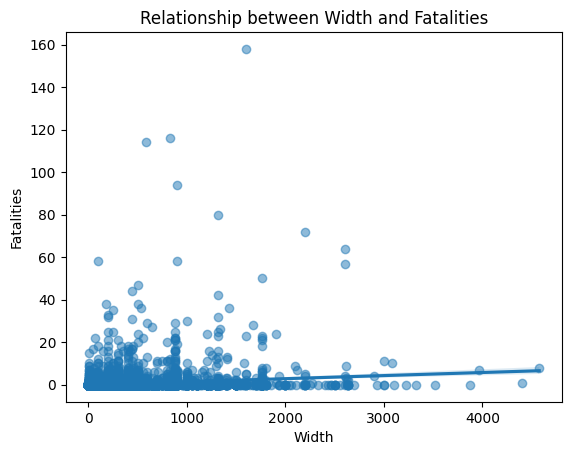

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numInstances = len(data)  # number of data instances

# Plot
sns.regplot(x ='wid', y='fat', data = data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Width and Fatalities')
plt.xlabel('Width')
plt.ylabel('Fatalities')
plt.show()

This code, using Pandas, Matplotlib, and Seaborn, generates a scatter plot with a regression line to visualize the relationship between tornado width ('wid') and fatalities ('fat'). The transparency of points is adjusted for clarity, providing insights into the potential correlation between width and fatalities in tornado data.

####Step 1: Split Input Data into Training and Test Sets


In this data preprocessing step, the code removes missing values, calculates the total number of instances, and then splits the input data into training and test sets. The dataset is filtered based on tornado width ('wid') and fatalities ('fat'). The training set comprises 80% of the data, while the test set contains the remaining instances.

In [54]:
data = data.dropna()
numInstances = len(data)
print(numInstances)

41517


In [55]:
numTrain = 33213   # number of training instances which is 80% of the data for training
numTest = numInstances - numTrain
X = data[['wid']]
y = data[['fat']]


X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

####Step 2: Fit Regression Model to Training Set

n this step, a linear regression model is trained on the provided training set using scikit-learn. The code initializes a linear regression object, and then fits the model to the training data, enabling it to learn the relationship between tornado width ('wid') and fatalities ('fat').

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression()

####Step 3: Apply Model to the Test Set


In the third step, the trained linear regression model is applied to the test set. Using the features from the test set (tornado width), the model predicts the corresponding fatalities. This step evaluates the model's generalization performance on unseen data, generating predicted values for comparison with the actual test set outcomes.

In [57]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

####Step 4: Evaluate Model Performance on Test Set


In the fourth step, the performance of the linear regression model is evaluated on the test set. A scatter plot visually compares true and predicted fatalities, while metrics like root mean squared error and R-squared provide quantitative measures of the model's accuracy and goodness of fit, respectively.

Root mean squared error = 2.2485


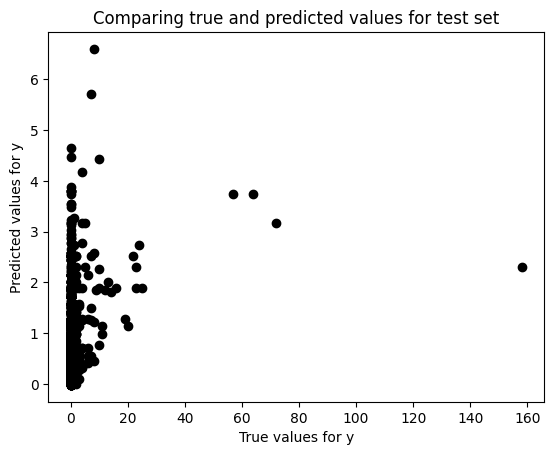

In [58]:
import numpy as np
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

The plot depicts a comparing actual and predicted values in the test set, revealing a root mean squared error of 2.2485. The y-axis spans from 0 to 160, while the x-axis ranges from 0 to 7. Notably, a few outliers emerge beyond 40 on the y-axis.

In [59]:
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

R-squared = 0.0396


Step 5: Postprocessing

In the final step, postprocessing involves displaying the parameters of the trained linear regression model. The code prints the slope and intercept values, essential components of the regression equation. Additionally, a scatter plot with the predicted function visualizes the model's performance, providing insights into the relationship between tornado width and fatalities.

In [60]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])

Slope =  0.0014475691781841713


In [51]:
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

Intercept =  -171429.9123604854


Text(0, 0.5, 'y')

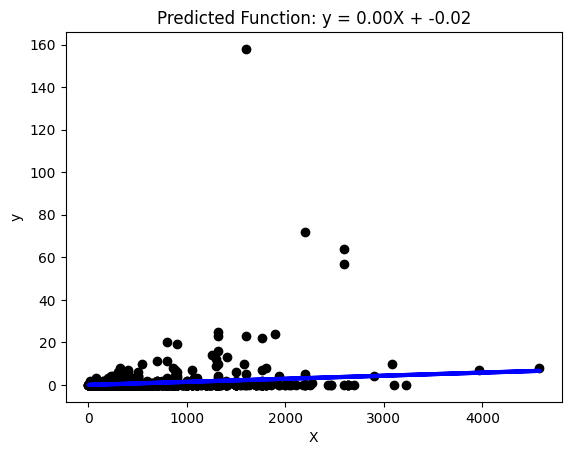

In [61]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')


This code generates a visual representation of the model's predictions on the test set. It creates a scatter plot with actual data points in black and overlays a blue line representing the predicted function(y=0.00X + -0.02) generated by the linear regression model. The title and axis labels provide context and insights into the relationship between the input feature (X) and the predicted output (y).

###Effect of Correlated Attributes


This analysis investigates the influence of correlated attributes on data modeling. Exploring the effect of interdependence among variables, the study assesses how correlations impact the performance and accuracy of predictive models, shedding light on the complexities introduced by correlated attributes in data analysis and machine learning.

This section explores the impact of correlated attributes on regression model performance. By introducing four additional variables (X2, X3, X4, X5) strongly correlated with the initial variable X, the code evaluates the influence on regression models. The relationship between X and y remains constant, allowing for a comparison of training and test set errors.

Text(0.5, 1.0, 'Correlation between X4 and X5 = 0.4364')

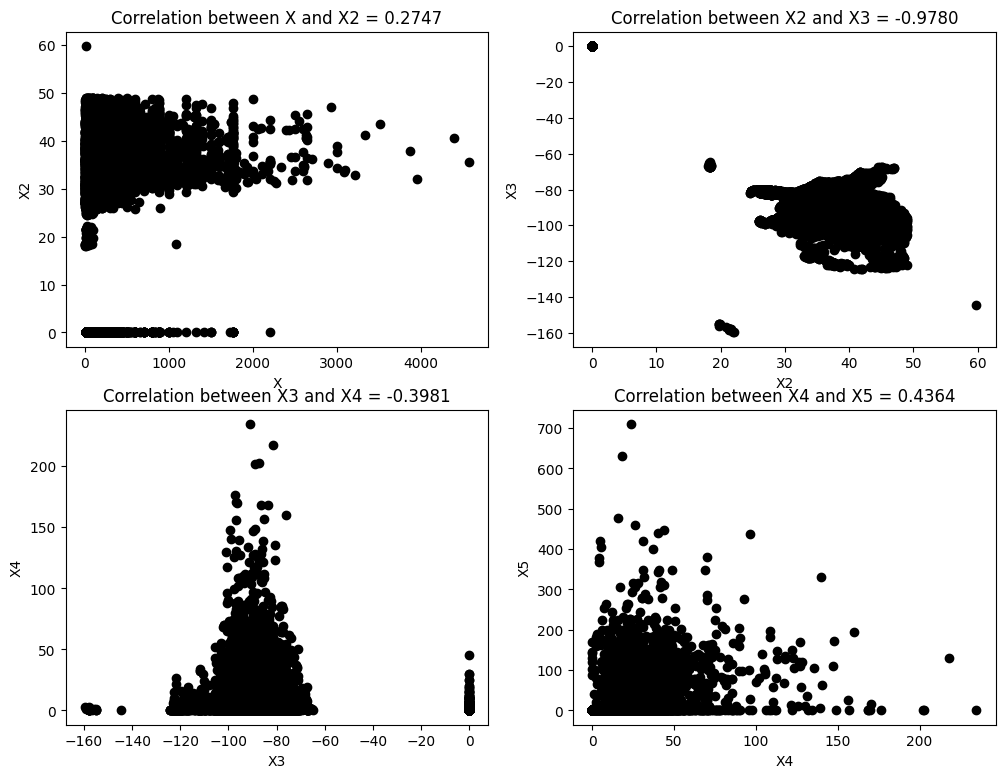

In [187]:
X2 = data[['elat']]
X3 = data[['elon']]
X4 = data[['len']]
X5 = data[['f3']]

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)


The code generates a 2x2 subplot with scatter plots, each illustrating the correlation between the initial variable X and additional variables X2, X3, X4, and X5. The scatter plots are displayed in a 2x2 grid, and each subplot includes points plotted in black, showcasing the relationship between the respective pairs of variables. The correlation coefficient between X and each additional variable is calculated and displayed as the subplot title, providing a visual and quantitative representation of the correlations among these variables in the dataset.

*The Correlation between width and Ending Latitude is 0.2747

*The Correlation between Ending Latitude and Ending Longitude is -0.9780

*The Correlation between Ending Longitude and length is -0.3987

*The Correlation between length and FIPS code for the 3rd county is 0.4346

In [188]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

In [189]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

LinearRegression()

In [190]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

LinearRegression()

In [191]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

LinearRegression()

In [192]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

LinearRegression()

In [193]:
regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train)

LinearRegression()

In [194]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,0.023678
1,0.00 X + 0.00 X2 + -0.05,1.696500,2.251408,0.055775
2,0.00 X + 0.00 X2 + 0.00 X3 + -0.05,1.696491,2.251265,0.056950
3,0.00 X + -0.00 X2 + 0.00 X3 + 0.03 X4 + -0.05,1.668300,2.199408,0.091112
4,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847


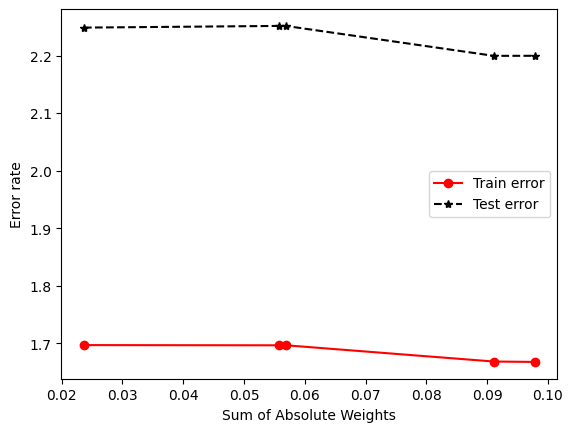

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)),
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)),
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1],
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)),
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1],
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)),
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0],
                                        regr5.coef_[0][1], regr5.coef_[0][2],
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)),
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results


The plot depicts the relationship between the sum of absolute weights in regression models and their respective training and test errors. Each model, characterized by its equation and coefficients, is represented on the x-axis, with training and test errors shown on the y-axis. The red line denotes training error, and the black dashed line represents test error.

*The Train Error has the highest Error Rate 1.7 at 0.02 Sum of Absolute Weight

*The Test Error has the highest Error Rate 2.25 at 0.02 Sum of Absolute Weight

###Ridge Regression

Ridge Regression, a form of linear regression, combats multicollinearity by introducing regularization through a penalty term in the least squares objective function. It constrains the sum of squared coefficients, preventing overfitting and offering stability in high-dimensional datasets. This variant of multiple linear regression (MLR) uses a hyperparameter (alpha) to control model complexity, showcasing its impact on correlated attributes in the example compared with MLR results.

In [196]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(X_train5, y_train)

Ridge(alpha=0.4)

In [197]:
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0],
                                        ridge.coef_[0][1], ridge.coef_[0][2],
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,0.023678
1,0.00 X + 0.00 X2 + -0.05,1.696500,2.251408,0.055775
2,0.00 X + 0.00 X2 + 0.00 X3 + -0.05,1.696491,2.251265,0.056950
3,0.00 X + -0.00 X2 + 0.00 X3 + 0.03 X4 + -0.05,1.668300,2.199408,0.091112
4,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
Ridge,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847


###Lasso Regssion


Lasso Regression is a linear regression technique introducing L1 regularization, appending an absolute value penalty term to the ordinary least squares objective function. It encourages sparsity by setting some coefficients to zero, fostering a more interpretable model. An extension of ridge regression, lasso addresses sparsity issues, demonstrated in the example code below on a correlated dataset.

In [198]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(X_train5, y_train)

Lasso(alpha=0.02)

In [199]:
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0],
                                        lasso.coef_[1], lasso.coef_[2],
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0])
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,0.023678
1,0.00 X + 0.00 X2 + -0.05,1.696500,2.251408,0.055775
2,0.00 X + 0.00 X2 + 0.00 X3 + -0.05,1.696491,2.251265,0.056950
3,0.00 X + -0.00 X2 + 0.00 X3 + 0.03 X4 + -0.05,1.668300,2.199408,0.091112
4,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
Ridge,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
Lasso,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667640,2.199729,0.055282


###Hyperparameter Selection via Cross-Validation

Hyperparameter selection via cross-validation optimizes model performance by evaluating various values through cross-validation, ensuring robustness and generalization. Both ridge and lasso regression address overfitting, but choosing the optimal hyperparameter, (alpha), is challenging. The examples below demonstrate 5-fold cross-validation for hyperparameter selection, detailed in Chapter 3, showcasing ridge regression with varied (alpha) using RidgeCV() for optimal selection.

In [200]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.2, 0.4, 0.6, 0.8, 1.0])
ridge.fit(X_train5, y_train)

RidgeCV(alphas=[0.2, 0.4, 0.6, 0.8, 1.0], cv=5)

In [201]:
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0],
                                        ridge.coef_[0][1], ridge.coef_[0][2],
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]
print("Selected alpha = %.2f" % ridge.alpha_)

Selected alpha = 1.00


In [202]:
ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,0.023678
1,0.00 X + 0.00 X2 + -0.05,1.696500,2.251408,0.055775
2,0.00 X + 0.00 X2 + 0.00 X3 + -0.05,1.696491,2.251265,0.056950
3,0.00 X + -0.00 X2 + 0.00 X3 + 0.03 X4 + -0.05,1.668300,2.199408,0.091112
4,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
RidgeCV,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847


In [207]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0])
lasso.fit(X_train5, y_train.values.reshape(y_train.shape[0]))

LassoCV(alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0], cv=5)

In [208]:
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0],
                                        lasso.coef_[1], lasso.coef_[2],
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_)
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

Selected alpha = 0.01


In [209]:
lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,0.00 X + -0.02,1.696874,2.248482,0.023678
1,0.00 X + 0.00 X2 + -0.05,1.696500,2.251408,0.055775
2,0.00 X + 0.00 X2 + 0.00 X3 + -0.05,1.696491,2.251265,0.056950
3,0.00 X + -0.00 X2 + 0.00 X3 + 0.03 X4 + -0.05,1.668300,2.199408,0.091112
4,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
RidgeCV,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667634,2.199512,0.097847
LassoCV,0.00 X + -0.00 X2 + 0.00 X3 + 0.04 X4 + -0.00 ...,1.667635,2.199620,0.055058


**Summary**

The Python regression analysis begins by loading the Tornado dataset using Pandas, exploring its variables and structure. It then delves into illustrating linear regression with a scatter plot, exemplifying the relationship between tornado width and fatalities.

The tutorial progresses to Multiple Linear Regression (MLR), showcasing practical steps from data splitting to model fitting and evaluation. A step-by-step breakdown emphasizes postprocessing for a comprehensive understanding.

The analysis extends to exploring the impact of correlated attributes on regression models. It introduces additional variables and evaluates their influence on model performance, providing insights into the complexities introduced by correlated attributes.

The tutorial concludes with discussions on Ridge Regression and Lasso Regression, highlighting their roles in combating overfitting and addressing correlated attributes. Model performance metrics and visualizations illustrate the impact of regularization techniques.

Lastly, the tutorial explores hyperparameter selection via cross-validation, showcasing RidgeCV() and LassoCV() for optimal alpha values. The analysis provides a comprehensive guide to regression analysis, emphasizing practical implementation and model interpretation.